In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
cd Dummy\ code/BHEPImagesWithoutMask

/content/drive/My Drive/Dummy code/BHEPImagesWithoutMask


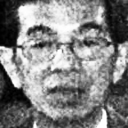

In [ ]:
import os
from PIL import Image
im= Image.open("1.jpg").resize((128,128))
im

In [ ]:
from random import shuffle
onlyfiles = os.listdir()
len(onlyfiles)

14000

In [ ]:
onlyfiles= sorted(onlyfiles, key= lambda x: int(x[:-4]))

In [ ]:
print(onlyfiles[:100])

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg']


In [ ]:
from scipy import misc
import imageio
import cv2
X_data =[ cv2.resize(cv2.imread(file),(64,64)) for file in onlyfiles]
# for file in onlyfiles:
#     face = cv2.imread(file)
#     face = cv2.resize(face, (64, 64) )
#     X_data.append(face)
#     print(file)
print(X_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import numpy as np
X = np.squeeze(X_data)

In [ ]:
X.shape

(14000, 64, 64, 3)

In [ ]:
X = X.astype('float32')
X /= 255


In [ ]:
import pandas as pd
df = pd.read_csv("../../Final Year Project/Dataset/FairFace Dataset/14K.csv")

In [ ]:
onlyfiles[-100:]

['17539.jpg',
 '17542.jpg',
 '17544.jpg',
 '17553.jpg',
 '17556.jpg',
 '17593.jpg',
 '17632.jpg',
 '17635.jpg',
 '17644.jpg',
 '17648.jpg',
 '17649.jpg',
 '17650.jpg',
 '17681.jpg',
 '17684.jpg',
 '17694.jpg',
 '17708.jpg',
 '17710.jpg',
 '17715.jpg',
 '17733.jpg',
 '17760.jpg',
 '17761.jpg',
 '17816.jpg',
 '17819.jpg',
 '17830.jpg',
 '17831.jpg',
 '17835.jpg',
 '17845.jpg',
 '17863.jpg',
 '17865.jpg',
 '17867.jpg',
 '17871.jpg',
 '17872.jpg',
 '17893.jpg',
 '17903.jpg',
 '17914.jpg',
 '17917.jpg',
 '17930.jpg',
 '17950.jpg',
 '17956.jpg',
 '17979.jpg',
 '17984.jpg',
 '18000.jpg',
 '18011.jpg',
 '18039.jpg',
 '18043.jpg',
 '18055.jpg',
 '18076.jpg',
 '18081.jpg',
 '18085.jpg',
 '18092.jpg',
 '18112.jpg',
 '18115.jpg',
 '18125.jpg',
 '18145.jpg',
 '18171.jpg',
 '18174.jpg',
 '18201.jpg',
 '18207.jpg',
 '18208.jpg',
 '18221.jpg',
 '18224.jpg',
 '18236.jpg',
 '18248.jpg',
 '18262.jpg',
 '18263.jpg',
 '18264.jpg',
 '18275.jpg',
 '18278.jpg',
 '18285.jpg',
 '18288.jpg',
 '18289.jpg',
 '1830

In [ ]:
classes= []
for index, row in df.iterrows():
  if row["gender"]=="Male":
    classes.append(0)
  else:
    classes.append(1)
len(classes)

14000

In [ ]:
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [ ]:
categorical_labels = to_categorical(classes, num_classes=2)

In [ ]:
categorical_labels[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:10000],categorical_labels[:10000]) , (X[10000:] , categorical_labels[10000:])
(x_valid , y_valid) = (x_test[:3200], y_test[:3200])
(x_test, y_test) = (x_test[3200:], y_test[3200:])

In [ ]:
len(x_train)+len(x_test) + len(x_valid) == len(X)

True

In [ ]:
print(len(x_train),len(x_test), len(x_valid))

10000 800 3200


In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(64,64,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=35,
         validation_data=(x_valid, y_valid),)


Epoch 1/35
157/157 [==============================] - 69s 433ms/step - loss: 0.6974 - accuracy: 0.5729 - val_loss: 0.6567 - val_accuracy: 0.6156
Epoch 2/35
157/157 [==============================] - 68s 431ms/step - loss: 0.6496 - accuracy: 0.6168 - val_loss: 0.6479 - val_accuracy: 0.6366
Epoch 3/35
157/157 [==============================] - 68s 433ms/step - loss: 0.5979 - accuracy: 0.6737 - val_loss: 0.5924 - val_accuracy: 0.6769
Epoch 4/35
157/157 [==============================] - 68s 434ms/step - loss: 0.5668 - accuracy: 0.6969 - val_loss: 0.5649 - val_accuracy: 0.7109
Epoch 5/35
157/157 [==============================] - 68s 434ms/step - loss: 0.5419 - accuracy: 0.7149 - val_loss: 0.5464 - val_accuracy: 0.7159
Epoch 6/35
157/157 [==============================] - 68s 431ms/step - loss: 0.5187 - accuracy: 0.7303 - val_loss: 0.5366 - val_accuracy: 0.7234
Epoch 7/35
157/157 [==============================] - 68s 432ms/step - loss: 0.4999 - accuracy: 0.7407 - val_loss: 0.5250 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8062499761581421


In [ ]:
labels =["Male",  # index 0
        "Female",      # index 1
        ]

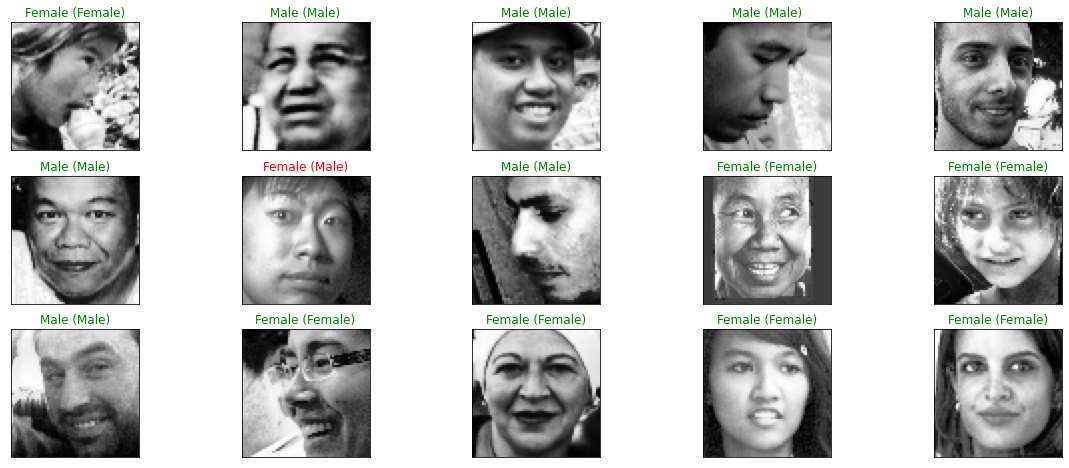

In [ ]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()